![DSA-Logo.png](.\images\DSA-Logo.png)

# <font color='black'>Projeto:</font> <font color='blue'>Prevendo o Nível de Satisfação dos Clientes do Santander.</font>

## <font color='black'>Data:</font> <font color='blue'>Maio, 2020</font>

## <font color='black'>Cientista de Dados:</font> <font color='blue'>Walter Trevisan</font>

## 05- Machine Learning (`Step 03`)

Nesta etapa de **`Machine Learning`**, vamos realizar as seguintes atividades, utilizando os *datasets* de treinamento que foram criados na etapa anterior **`05-Machine Learning (Step-01)`**, ou seja, o *dataset* **`X_train_v2.pickle`** (que contém os dados das variáveis preditoras) e o *dataset* **`y_train_v2.pickle`** (que contém os dados da variável *target*):

1. Carregar os *datasets* de treinamento: **`X_train_v2.pickle`** e **`y_train_v2.pickle`**;


2. Carregar os objetos relacionados aos **modelos de Machine Learning** que foram selecionados na etapa anterior;


3. Definir as **`métricas de classificação`** que serão calculadas nesta etapa de **`Machine Learning`**;


4. Realizar o ajuste fino dos seguintes algoritmos de classificação:

> 4.1 **`KNN`**: K Nearest Neighbors;

> 4.2 **`RFC`**: Random Forest Classifier;

> 4.3 **`XGBC`**: XGBoost Classifier.


5. Conclusão dos resultados, selecionando o **melhor** ou **melhores** algoritmos de classificação para a próxima etapa (**`Testes`**);


6. Salvar as **métricas de classificação** calculadas nas duas etapas de **`Machine Learning`** (**`Step 03`**).

## Setup

In [1]:
# As novas versões do Pandas e Matplotlib trazem diversas mensagens de aviso ao desenvolvedor.
# Então, vamos desativar essas mensagens.
import sys # O pacote "sys" permite manipulações com o sistema operacional:
import os  # Operation System (Packages and Functions)
import warnings
import matplotlib.cbook
if not sys.warnoptions:
    warnings.simplefilter("ignore")
warnings.simplefilter(action='ignore', category=FutureWarning)
warnings.filterwarnings("ignore", category=FutureWarning)
warnings.filterwarnings("ignore", category=matplotlib.cbook.mplDeprecation)

# Common imports:
import numpy as np    # NumPy
import pandas as pd   # Pandas
import itertools

# To plot pretty figures
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
mpl.rc('axes', labelsize=14)
mpl.rc('xtick', labelsize=12)
mpl.rc('ytick', labelsize=12)
# Importa o pacote "seaborn"
import seaborn as sns

# Machine Learning imports
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier

# Imports para "Avaliação da curva ROC":
from sklearn.metrics import roc_curve, roc_auc_score

from sklearn.model_selection import cross_val_score, cross_val_predict, GridSearchCV, RandomizedSearchCV
from scipy.stats import randint

# Flag de "Pesquisa":
# Se "True", realiza a pesquisa dos melhores hiperparâmetros.
# Se "False", faz a leitura dos melhores hiperparâmetros (objetos) pesquisados.
SEARCHING=False

# Flag para calcular/ler os "scores" de "Treinamento":
# Se "True", realiza o cálculo das pontuações (scores).
# Se "False", faz a leitura dos scores (objetos) calculados.
CROSS_VAL_SCORE=False

# Flag para fazer as previsões, utilizando validação cruzada, nos dados de treinamento:
# Se "True", faz as previsões utilizando a função.
# Se "False", faz a leitura das previsões (objetos) que foram salvas.
CROSS_VAL_PREDICT=False

# Define valor para "Cross Validation" (Número de 'folds'):
NUM_FOLDS=5 # Número de passadas ("folds")

# Define valor para "Random Search CV" (Número de 'iterações'):
NUM_ITER=20 # Número de iterações.

# Define valor para "Cross Validation Score" (Número de 'folds'):
NUM_FOLDS_CVS=5 # Número de passadas ("folds")

# Define valor para "Cross Validation Predict" (Número de 'folds'):
NUM_FOLDS_CVP=5 # Número de passadas ("folds")

# Define valor para reproduzirmos os mesmos resultados:
RANDOM_STATE=42 # Seed

# Definindo o diretório raiz (Root) onde serão armazenados todas as informações
# (Imagens, Objetos, Dados, Modelos de ML, etc...) do projeto.
# Diretório Raiz (Root) do Projeto:
PROJECT_ROOT_DIR = "."

# Path: onde serão armazenadas as "Imagens" (Figuras e Gráficos) desta Fase do Projeto:
PROJECT_IMG_PATH = os.path.join(PROJECT_ROOT_DIR, "Images", "05-Machine_Learning")
# Criando o diretório, se ele não existir:
os.makedirs(PROJECT_IMG_PATH, exist_ok=True)

# Path: onde ficarão armazenados os "Objetos" (Estrututras de Dados) relacionados ao Projeto:
PROJECT_OBJ_PATH = os.path.join(PROJECT_ROOT_DIR, "Objects")
# Criando o diretório, se ele não existir:
os.makedirs(PROJECT_OBJ_PATH, exist_ok=True)

# Path: onde ficarão armazenados os "Modelos" (Machine Learning) relacionados ao Projeto:
PROJECT_ML_PATH = os.path.join(PROJECT_ROOT_DIR, "Models")
# Criando o diretório, se ele não existir:
os.makedirs(PROJECT_ML_PATH, exist_ok=True)

# Path: onde ficarão armazenados os "datasets" (arquivos "csv") e os "Objetos" (Data Frames) do Projeto:
PROJECT_DATA_PATH = os.path.join(PROJECT_ROOT_DIR, "Data")
# Criando o diretório, se ele não existir:
os.makedirs(PROJECT_DATA_PATH, exist_ok=True)

# Path: onde estão armazenadas as classes e funções que serão utilizadas neste notebook:
PROJECT_LIB_PATH = os.path.join(PROJECT_ROOT_DIR, "Library")

# Adicionando o diretório ao 'path' do Sistema, para podermos importar classes e funções que serão
# utilizadas neste notebook:
sys.path.append(PROJECT_LIB_PATH)

# Importando para este notebook, as classes e funções definidas no módulo "DataScience_Library_v1_0":
import DataScience_Library_v1_0 as dslib

# Importando para este notebook, as classes e funções definidas no módulo "DataScience_Plot_Library_v1_0":
import DataScience_Plot_Library_v1_0 as ptlib

# Importando para este notebook, as classes e funções definidas no módulo "DataScience_ML_Library_v1_0":
import DataScience_ML_Library_v1_0 as mllib

# Importando para este notebook, as classes e funções definidas no módulo "DSA_Project_03_Library":
import DSA_Project_03_Library as pjlib

# Criando um objeto para calularmos os tempos de treinamento:
et = dslib.ElapsedTime(builder_msg=False)

print("Setup Complete!")

Setup Complete!


In [2]:
# Versões dos pacotes usados neste jupyter notebook:
%reload_ext watermark
%watermark -a "Walter Trevisan" --iversions

pandas     0.25.3
seaborn    0.10.0
matplotlib 3.2.1
numpy      1.18.2
Walter Trevisan


## 01- Carregando os *datasets* de treinamento: `X_train_v2.pickle` e `y_train_v2.pickle`

In [3]:
# Carregando o dataset "X_train_v2.pickle" que contém as variáveis preditoras:
X_train = dslib.pickle_object_load(path=PROJECT_DATA_PATH, file="X_train_v2.pickle",
                                   msg="The 'X_train_v2' (data frame) has been successfully uploaded!")

# Carregando o dataset "y_train_v2.pickle" que contém a variável target:
y_train = dslib.pickle_object_load(path=PROJECT_DATA_PATH, file="y_train_v2.pickle",
                                   msg="The 'y_train_v2' (data frame) has been successfully uploaded!")

The 'X_train_v2' (data frame) has been successfully uploaded!
The 'y_train_v2' (data frame) has been successfully uploaded!


## 02- Carregando os `objetos` (Modelos de `Machine Learning`):

Vamos carregar os seguintes **`objetos`**:

> 2.1 **`rfe`**: Contém as *features* (mais importantes) selecionadas para fazermos o treinamento do algorito **`KNN`**;

> 2.2 **`knn`**: Contém as informações do treinamento do algorito **`KNN`**;

> 2.3 **`rfecv_rfc`**: Contém as informações do treinamento do algorito **`RFC`**;

> 2.4 **`rfecv_xgbc`**: Contém as informações do treinamento do algorito **`XGBC`**.

In [4]:
# 2.1 Carregando o modelo "rfecv_knn_v1.pickle":
rfe = dslib.pickle_object_load(path=PROJECT_ML_PATH, file="rfe_feature_selection.pickle",
                               msg="The model (RFE) has been successfully uploaded!")

# 2.2 Carregando o modelo "knn_v1.pickle":
knn = dslib.pickle_object_load(path=PROJECT_ML_PATH, file="knn_v1.pickle",
                               msg="The model (KNN) has been successfully uploaded!")

# 2.3 Carregando o modelo "rfecv_rfc_v1.pickle":
rfecv_rfc = dslib.pickle_object_load(path=PROJECT_ML_PATH, file="rfecv_rfc_v1.pickle",
                                     msg="The model (RFC) has been successfully uploaded!")

# 2.4 Carregando o modelo "rfecv_xgbc_v1.pickle":
rfecv_xgbc = dslib.pickle_object_load(path=PROJECT_ML_PATH, file="rfecv_xgbc_v1.pickle",
                                      msg="The model (XGBC) has been successfully uploaded!")

The model (RFE) has been successfully uploaded!
The model (KNN) has been successfully uploaded!
The model (RFC) has been successfully uploaded!
The model (XGBC) has been successfully uploaded!


## 03- Definição das `Métricas de Classificação`:

### Métricas: `Accuracy`, `Precision`, `Recall`, `f1-score` e `ROC Curve (AUC)`

### `Accuracy`:

A **acurácia** do modelo mede a taxa de acertos das classes ***True Positive*** e ***True Negative***, sendo calculada pela fórmula abaixo:

**`Accuracy = (TP + TN)/(TP + TN + FP + FN)`**, onde:

1. **`TP`** é o número de ***verdadeiros positivos***;

2. **`TN`** é o número de ***verdadeiros negativos***;

3. **`FP`** é o número de ***falsos positivos***.

4. **`FN`** é o número de ***falsos negativos***.

Um classificador perfeito teria apenas *verdadeiros positivos* (**TP**) e *verdadeiros negativos* (**TN**), ou seja, sua **matriz de confusão** teria valores diferentes de zero somente na sua diagonal principal (superior esquerda para a inferior direita), ou seja, a sua acurácia (**`accuracy`**) seria de **100%**.

### `Precision`:

Uma outra métrica interessante a ser observada na ***matriz de confusão*** é a `acurácia das previsões positivas`; que é chamada de ***precisão (precision)*** do classificador e é calculada pela fórmula abaixo:

**`Precision = TP/(TP + FP)`**, onde:

1. **`TP`** é o número de ***verdadeiros positivos***;

2. **`FP`** é o número de ***falsos positivos***.

### `Recall`:

Entretanto, a precisão é utilizada em conjunto com outra métrica chamada ***revocação (recall)***, também conhecida como ***sensibilidade*** ou ***taxa de verdadeiros positivos (TPR)***: esta é a taxa de `instâncias positivas que são corretamente detectadas` pelo classificador, sendo calculada pel fórmula abaixo:

**`Recall = TP/(TP + FN)`**, onde:

1. **`TP`** é o número de ***verdadeiros positivos***;

2. **`FN`** é o número de ***falsos negativos***.

### `f1-score`:

Muitas vezes, é conveniente combinarmos **precisão** e **revocação** em uma única métrica chamada ***pontuação F1 (f1 score)***, principalmente se precisarmos comparar dois ou mais classificadores.

A ***pontuação F1*** é a ***média harmônica*** da **precisão** e **revocação**, sendo calculada pela fórmula abaixo:

**`F1 = TP/(TP + (FN + FP)/2)`**, onde:

1. **`TP`** é o número de ***verdadeiros positivos***;

2. **`FN`** é o número de ***falsos negativos***;

3. **`FP`** é o número de ***falsos positivos***.

Enquanto a média regular trata igualmente todos os valores, a média harmônica dá muito mais peso aos valores mais baixos, ou seja, o classificador só obterá uma ***pontuação F1*** alta, se a **revocação** e a **precisão** forem altas.

### `ROC Curve (AUC)`

A curva **ROC** (*características operacionais do receptor*) é outra ferramenta comum utilizada com classificadores binários. É muito semelhante à curva de **`precision/recall`**, mas, em vez de plotar a **precision versus recall**, a curva **ROC** plota a *taxa de verdadeiros positivos* (***TPR = True Positive Rate***), que é um outro nome dado para ***recall***, versus a *taxa de falsos positivos* (***FPR = False Positive Rate***). O ***FPR*** é a razão de instâncias negativas incorretamente classificadas como positivas. É igual a 1 menos *taxa de verdadeiros negativos* (***TNR = True Negative Rate***), que é a razão de instâncias negativas que são corretamente classificadas como negativas. A ***TNR*** também é chamada de ***especificidade***.

Portanto, a ***Curva ROC*** plota a ***`sensibilidade (recall)` versus `1 - especificidade`***.

Equações:

1. **`TPR = TP/(TP + FN)`** --> ***True Positive Rate***, ou também ***`recall`*** ou também ***`sensibilidade`***

2. **`FPR = FP/(FP + TN)`** --> ***False Positive Rate***

3. **`TNR = TN/(TN + FP)`** --> ***True Negative Rate***, ou também ***especificidade***

4. **`FPR = 1 - TNR`** ou também **`FPR = 1 - especificidade`**

Então, para plotarmos a ***ROC curve***, primeiro precisamos calcular a **TPR** e a **FPR** para vários valores de ***thresholds*** (limiares) utilizando a função ***`roc_curve()`***.

Mas, a função `roc_curve()` utiliza as **pontuações de decisão** (ao invés das previsões) de todas as instâncias do nosso dataset, ou seja, precisamos primeiro calcular estas pontuações (`scores`) de decisão utilizando o método `decision_function` da função `cross_val_predict()`.

Entretando, devido ao modo como funcionam, alguns classificadores (por exemplo: a classe `KNeighborsClassifier`) não possuem um método `decision_function()`. Em vez disso, eles possuem um método chamado `predict_proba()`. Este método retorna um array que contém uma linha por instância e uma coluna por classe, cada uma contendo a probabilidade de a instância dada pertencer à classe dada (por exemplo, neste projeto, 70% de chance de um cliente estar insatisfeito). Portanto, quando utilizarmos estes classificadores, primeiro precisaremos calcular as probabilidades com o método `predict_proba()`, e, então, em seguida calcularemos as *pontuações de decisão* utilizando a probabilidade da classe positiva como sendo a pontuação.

Observando o gráfico da **Curva ROC**, quanto maior a ***`TPR (recall)`***, mais falsos positivos (***`FPR`***) o classificador produz, ou seja, menor é a sua **precisão** (***`precision`***). A linha pontilhada representa a curva ROC de um classificador puramente aleatório; um bom classificador fica mais distante dessa linha possível (em direção ao canto superior esquerdo)!

Uma forma de compararmos dois ou mais classificadores é medirmos a **área abaixo da curva** (***`AUC = Area Under Curve`***). Um classificador perfeito terá um ***`ROC AUC = 1`***, enquanto que um classificador puramente aleatório terá um ***`ROC AUC = 0.5`***.

Portanto, vamos criar um objeto do tipo *data frame* para armazenar as seguintes métricas de classificação, para cada algorítimo de *machine learning* selecionado para esta etapa, a saber: **`Accuracy`**, **`Precision`**, **`Recall`**, **`f1-score`** e **`AUC`**:

In [5]:
# Agora, vamos criar um data frame onde serão armazenadas as métricas de classificação dos algoritmos selecionados:
classif_metrics_df = pd.DataFrame(data={}, columns=['Accuracy', 'Precision', 'Recall', 'f1-score', 'AUC'],
                                  index=['KNN', 'RFC', 'XGBC'])

# Define um nome para os índices:
classif_metrics_df.index.name = 'Models'

# Mostrando o data frame criado:
classif_metrics_df

,Accuracy,Precision,Recall,f1-score,AUC
Models,,,,,
KNN,NaN,NaN,NaN,NaN,NaN
RFC,NaN,NaN,NaN,NaN,NaN
XGBC,NaN,NaN,NaN,NaN,NaN


## 04- Ajuste Fino dos Hiperparâmetros (Modelos ML):

Agora, vamos realizar o ajuste fino dos algoritmos de classificação, utilizando **[GridSearchCV](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.GridSearchCV.html)** e **[RandomizedSearchCV ](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.RandomizedSearchCV.html)** para selecionar os melhores hiperparâmetros dos algoritmos.

## 4.1- [KNN](https://scikit-learn.org/stable/modules/generated/sklearn.neighbors.KNeighborsClassifier.html) (K Nearest Neighbors):

Para selecionarmos os melhores parâmetros do **`KNN`**, utilizaremos a função **`RandomizedSearchCV()`**. Também utilizaremos neste processo as melhores *features* selecionadas na etapa anterior.

### `Feature Selection`:

Vamos utilizar as *features* selecionadas (importantes) na etapa anterior.

In [6]:
# Selecionando os dados de treinamento, de acordo com as features selecionadas (Importantes) na etapa anterior (Step 01):
X_train_rfe = X_train[:, rfe.get_support()]
print("X_train_rfe (shape):",X_train_rfe.shape)

X_train_rfe (shape): (116820, 20)


### `RandomizedSearchCV()` (Randomized search on hyper parameters):

In [7]:
# Verifica se vamos realizar a pesquisa dos hiperparâmetros:
if (False): # Utilizar "SEARCHING=True" (no Setup) para pesquisar os melhores hiperparâmetros!
    # Definindo o "grid" de parâmetros:
    param_distribs = [{'weights': ["uniform", "distance"], 'n_neighbors': randint(low=1, high=30)}]
    
    # Inicia a pesquisa:
    et.start(et.start(msg="Starting the searching (KNN) with 'RandomSearchCV'..."))
    
    # Criando uma instância do classificador KNN:
    knn_clf = KNeighborsClassifier(n_jobs=-1)
    
    # Criando uma instância do 'RandomizedSearchCV':
    rnd_search_knn = RandomizedSearchCV(knn_clf, param_distributions=param_distribs,
                                        n_iter=NUM_ITER, cv=NUM_FOLDS, scoring='accuracy',
                                        random_state=RANDOM_STATE)
    
    # Fit nos dados de treinamento:
    rnd_search_knn.fit(X_train_rfe, y_train)
    
    # Fim da pesquisa:
    et.end(msg="Time consumed for searching (KNN) with 'RandomSearchCV':")
    
    # Salvando o modelo com os melhores hiperparâmetros encontrados:
    dslib.pickle_object_save (path=PROJECT_ML_PATH, file="rnd_search_knn_v2.pickle", object_name=rnd_search_knn,
                              msg="Version 2 of the model (KNN), with 'RandomSearchCV', was successfully saved!")
else:
    # Os melhores hiperparâmetros já foram encontrados!
    # Carregando o modelo com os melhores hiperparâmetros: "rnd_search_knn_v2.pickle":
    rnd_search_knn = dslib.pickle_object_load(path=PROJECT_ML_PATH, file="rnd_search_knn_v2.pickle",
                                              msg="Version 2 of the model (KNN), with 'RandomSearchCV', has been successfully uploaded!")

Version 2 of the model (KNN), with 'RandomSearchCV', has been successfully uploaded!


**Análise:** o treinamento do **`KNN`**, utilizando a função **`RandomSearchCV()`** para a seleção dos melhores hiperparâmetros, demorou **`13.47 minutos`**.

In [8]:
# Relatório dos melhores resultados utilizando o "RandomSearchCV()":
mllib.best_results_report(estimator=rnd_search_knn, title="Best results with 'Random Search CV':")

Best results with 'Random Search CV':
Best params: {'n_neighbors': 1, 'weights': 'distance'}
Best estimator: KNeighborsClassifier(n_jobs=-1, n_neighbors=1, weights='distance')
Best score: 0.8934


Vamos ver a pontuação (**`Score`**) de cada combinação dos hiperparâmetros testados durante a pesquisa com o **`Random Search`**:

In [9]:
cv_res = rnd_search_knn.cv_results_
for mean_score, params in zip(cv_res["mean_test_score"], cv_res["params"]):
    print(mean_score, params)

0.8700564971751412 {'n_neighbors': 7, 'weights': 'distance'}
0.8202277007361752 {'n_neighbors': 29, 'weights': 'uniform'}
0.8616332819722651 {'n_neighbors': 11, 'weights': 'distance'}
0.8202277007361752 {'n_neighbors': 29, 'weights': 'uniform'}
0.8700564971751412 {'n_neighbors': 7, 'weights': 'distance'}
0.8309193631227529 {'n_neighbors': 19, 'weights': 'uniform'}
0.8481595617188837 {'n_neighbors': 11, 'weights': 'uniform'}
0.827170005136107 {'n_neighbors': 24, 'weights': 'uniform'}
0.8847286423557611 {'n_neighbors': 4, 'weights': 'distance'}
0.827170005136107 {'n_neighbors': 24, 'weights': 'uniform'}
0.8296695771272041 {'n_neighbors': 22, 'weights': 'uniform'}
0.8919191919191919 {'n_neighbors': 2, 'weights': 'distance'}
0.8613251155624037 {'n_neighbors': 12, 'weights': 'distance'}
0.8774524910118131 {'n_neighbors': 6, 'weights': 'distance'}
0.8233521657250471 {'n_neighbors': 28, 'weights': 'uniform'}
0.8933573018318782 {'n_neighbors': 1, 'weights': 'distance'}
0.8453175826057182 {'n_n

### `GridSearchCV()` (Exhaustive search over specified parameter values for an estimator):

In [10]:
# Verifica se vamos realizar a pesquisa dos hiperparâmetros:
if (SEARCHING): # Utilizar "SEARCHING=True" (no Setup) para pesquisar os melhores hiperparâmetros!
    # Definindo o "grid" de parâmetros:
    n_neighbors = list(range(1, 31))
    param_grid = [{'weights': ["uniform", "distance"], 'n_neighbors': n_neighbors}]
    
    # Inicia a pesquisa:
    et.start(et.start(msg="Starting the searching (KNN) with 'GridSearchCV'..."))
    
    # Criando uma instância do classificador KNN:
    knn_clf = KNeighborsClassifier(n_jobs=-1)
    
    # Criando uma instância do 'GridSearchCV':
    grd_search_knn = GridSearchCV(estimator=knn_clf, param_grid=param_grid, scoring='accuracy',
                                  n_jobs=-1, refit=True, cv=NUM_FOLDS, verbose=3, return_train_score=False)

    # Fit nos dados de treinamento:
    grd_search_knn.fit(X_train_rfe, y_train)
    
    # Fim da pesquisa:
    et.end(msg="Time consumed for searching (KNN) with 'GridSearchCV':")
    
    # Salvando o modelo com os melhores hiperparâmetros encontrados:
    dslib.pickle_object_save (path=PROJECT_ML_PATH, file="grd_search_knn_v2.pickle", object_name=grd_search_knn,
                              msg="Version 2 of the model (KNN), with 'GridSearchCV', was successfully saved!")
else:
    # Os melhores hiperparâmetros já foram encontrados!
    # Carregando o modelo com os melhores hiperparâmetros: "grd_search_knn_v2.pickle":
    grd_search_knn = dslib.pickle_object_load(path=PROJECT_ML_PATH, file="grd_search_knn_v2.pickle",
                                              msg="Version 2 of the model (KNN), with 'GridSearchCV', has been successfully uploaded!")

Version 2 of the model (KNN), with 'GridSearchCV', has been successfully uploaded!


**Análise:** o treinamento do **`KNN`**, utilizando a função **`GridSearchCV()`** para a seleção dos melhores hiperparâmetros, demorou **`33.32 minutos`**.

In [11]:
# Relatório dos melhores resultados utilizando o "GridSearchCV()":
mllib.best_results_report(estimator=grd_search_knn, title="Best results with 'Grid Search CV':")

Best results with 'Grid Search CV':
Best params: {'n_neighbors': 1, 'weights': 'uniform'}
Best estimator: KNeighborsClassifier(n_jobs=-1, n_neighbors=1)
Best score: 0.8934


**Análise:** podemos observar que com as duas funções (`RandomSearchCV()` e `GridSearchCV()`) conseguimos encontrar os melhores hiperparâmetros para o **`KNN`**. Com os melhores parâmetros atingimos uma pontuação (`score`) de **89.34%**, ou seja, a sua acurácia (`accuracy`) aumentou **`3%`** em relação a sua versão anterior (**v1**).

### `Matriz de Confusão`

Para calcularmos a ***Confusion Matrix***, primeiro precisamos ter um conjunto de previsões que possam ser comparadas com os valores (*labels*) reais. Como não podemos utilizar os dados do nosso conjunto de testes, utilizaremos a função ***`cross_val_predict()`***.

Assim como a função ***cross_val_score***, ela desempenha a validação cruzada *K-fold*, mas em vez de retornar as pontuações da avaliação, ela retorna as previsões feitas em cada parte do teste, ou seja, isso significa que nós obteremos uma previsão limpa para cada instância no conjunto de treinamento (**"limpa"**, significando que a previsão é feita por um modelo que nunca viu os dados durante o treinamento).

In [12]:
# Calculando as previsões nos dados de treinamento:
# Verifica se vamos fazer as previsões utilizando "validação cruzada":
if (CROSS_VAL_PREDICT): # Utilizar "CROSS_VAL_PREDICT=True" (no Setup) para fazer as 'previsões'!
    # Inicia as previsões:
    et.start(et.start(msg="Starting cross validation predict (KNN)..."))
    y_train_pred_knn = cross_val_predict(estimator=grd_search_knn.best_estimator_, X=X_train_rfe, y=y_train,
                                         cv=NUM_FOLDS_CVP, n_jobs=-1)
    
    # Fim das previsões:
    et.end(msg="Time consumed for cross validation predict (KNN):")
    
    # Salvando as previsões:
    dslib.pickle_object_save (path=PROJECT_ML_PATH, file="y_train_pred_knn_v2.pickle", object_name=y_train_pred_knn,
                              msg="Version 2 of the predicts (KNN) was successfully saved!")
else:
    # As previsões já foram feitas!
    # Carregando as previsões "y_train_pred_knn_v2.pickle":
    y_train_pred_knn = dslib.pickle_object_load(path=PROJECT_ML_PATH, file="y_train_pred_knn_v2.pickle",
                                                msg="Version 2 of the predicts (KNN) has been successfully uploaded!")

Version 2 of the predicts (KNN) has been successfully uploaded!


**Análise:** o tempo consumido para fazermos as **`previsões`**, com o modelo **`KNN`**, foi de **26.37 segundos**.

Saving figure: plot_confusion_matrix_knn_v2


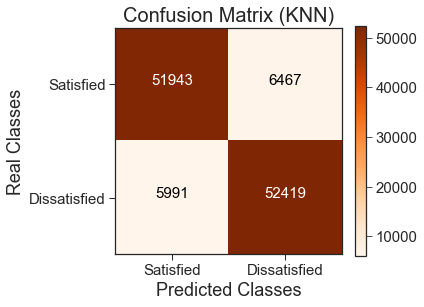

In [13]:
# Plot da "Confusion Matrix":
target_names = ['Satisfied', 'Dissatisfied']
ptlib.plot_confusion_matrix(truth=y_train, pred=y_train_pred_knn, display_labels=target_names, normalize=False,
                            plot_style='seaborn-ticks', colors=plt.cm.Oranges, title="Confusion Matrix (KNN)",
                            title_fontsize=20, labels_fontsize=18, ticks_fontsize=15, values_fontsize=15, rotation=0,
                            width=6, height=6, figure_id='plot_confusion_matrix_knn_v2', figure_path=PROJECT_IMG_PATH,
                            figure_file_format="png", figure_file_extension=".png", tight_layout=True, dpi=300
                           )

**Análise:**

Cada **linha** em uma **Matriz de Confusão** representa uma **Classe Real**, enquanto que cada **coluna** representa uma **Classe Prevista**. Portanto, a primeira linha considera os clientes **Satisfeitos** (a classe negativa) e a segunda linha considera os clientes **Insatisfeitos** (a classe positiva). A primeira coluna considera os clientes preditos como **Satisfeitos** (a classe negativa) e a segunda coluna considera os clientes preditos como **Insatisfeitos** (a classe positiva).

Sendo assim, temos no gráfico **`Confusion Matrix`** os seguintes valores:

1. **`TN = 51943`** (**True Negative**): são os clientes que foram classificados (preditos) `corretamente` como `Satisfeitos`;

2. **`FP = 6467`** (**False Positive**): são os clientes que foram classificados (preditos) `erroneamente` como `Insatisfeitos` (na verdade os clientes estão *Satisfeitos*);

3. **`FN = 5991`** (**False Negative**): são os clientes que foram classificados (preditos) `erroneamente` como `Satisfeitos` (na verdade os clientes estão *Insatisfeitos*);

4. **`TP = 52419`** (**True Positive**): são os clientes que foram classificados (preditos) `corretamente` como `Insatisfeitos`.

### Métricas: `Accuracy`, `Precision`, `Recall`, e `f1-score`

In [14]:
# Calculando e mostrando as métricas de classificação com o "KNN":
print("Metrics of 'KNN' model:")
accuracy, precision, recall, F1_score = mllib.classif_metrics(y_real=y_train, y_pred=y_train_pred_knn, metric='All')

# Armazenando as métricas calculadas no data frame:
classif_metrics_df.loc['KNN', 'Accuracy'] = np.round(accuracy, decimals=4)
classif_metrics_df.loc['KNN', 'Precision'] = np.round(precision, decimals=4)
classif_metrics_df.loc['KNN', 'Recall'] = np.round(recall, decimals=4)
classif_metrics_df.loc['KNN', 'f1-score'] = np.round(F1_score, decimals=4)

Metrics of 'KNN' model:
Accuracy = 0.8934
Precision = 0.8902
Recall = 0.8974
f1-score = 0.8938


**Análise:**

1. com o classificador **`KNN`** obtivemos uma taxa de **acurácia** de **89.34%**, ou seja, é a porcentagem de clientes **satisfeitos** e **insatisfeitos** que foram classificados corretamente por ele. Em nosso projeto, o objetivo é entregarmos uma **acurácia** que seja, no **mínimo**, de **90%**. Portanto, o nosso classificador **`KNN`** apresentou um resultado *muito próximo do mínimo desejado*;


2. com o nosso classificador **`KNN`** obtivemos uma taxa de **precisão** de **89.02%**, ou seja, é a porcentagem de clientes **insatisfeitos** que foram classificados corretamente por ele;


3. com o nosso classificador **`KNN`** obtivemos uma taxa de **revocação** de **89.74%**, ou seja, é a porcentagem de clientes **insatisfeitos** que ele conseguiu detectar. Em nosso projeto, o objetivo é entregarmos uma taxa de **revocação** que seja, no **mínimo**, de **85%**. Portanto, o nosso classificador **`KNN`** apresentou um resultado *acima do mínimo desejado*;


4. com o classificador **`KNN`** obtivemos uma **`pontuação F1`** **alta**, devido principalmente a ótima taxa de **revocação**.

### `Curva ROC`

In [15]:
# Calculando as 'pontuações de decisão' nos dados de treinamento:
# Verifica se vamos fazer os cálculos utilizando "validação cruzada":
if (CROSS_VAL_PREDICT): # Utilizar "CROSS_VAL_PREDICT=True" (no Setup) para calcular as pontuações de decisão:
    # Inicia o cálculo das pontuações de decisão:
    et.start(et.start(msg="Starting the calculations of decision scores (KNN)..."))
    
    # Primeiro, calcularemos as probabilidades de cada classe:
    y_probas_knn = cross_val_predict(estimator=grd_search_knn.best_estimator_, X=X_train_rfe, y=y_train,
                                     cv=NUM_FOLDS_CVP, method="predict_proba", n_jobs=-1)
    
    # Agora, vamos utilizar as probabilidades da classe positiva (1) como sendo as pontuações de decisão:
    y_dec_scores_knn = y_probas_knn[:, 1]
    
    # Fim do cálculo das pontuações de decisão:
    et.end(msg="Time consumed for the calculations of decision scores (KNN):")
    
    # Salvando as pontuações de decisão:
    dslib.pickle_object_save (path=PROJECT_ML_PATH, file="y_dec_scores_knn_v2.pickle", object_name=y_dec_scores_knn,
                              msg="Version 2 of the decision scores (KNN) was successfully saved!")
else:
    # Os cálculos das pontuações de decisão já foram feitas!
    # Carregando as pontuações de decisão "y_dec_scores_knn_v2.pickle":
    y_dec_scores_knn = dslib.pickle_object_load(path=PROJECT_ML_PATH, file="y_dec_scores_knn_v2.pickle",
                                                msg="Version 2 of the decision scores (KNN) has been successfully uploaded!")

Version 2 of the decision scores (KNN) has been successfully uploaded!


**Análise:** o tempo consumido para calcularmos as **`pontuações de decisão`**, com o modelo **`KNN`**, foi de **22.55 segundos**.

In [16]:
# Calculando o "FPR" e "TPR":
fpr_knn, tpr_knn, thresholds_knn = roc_curve(y_train, y_dec_scores_knn)

# Calculando a "Area Under Curve" (AUC):
auc = roc_auc_score(y_train, y_dec_scores_knn)

# Armazenando a métrica ('AUC') no data frame:
classif_metrics_df.loc['KNN', 'AUC'] = np.round(auc, decimals=4)

Saving figure: plot_roc_curve_knn_v2


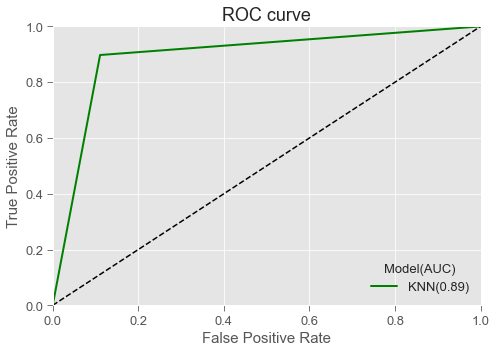

In [17]:
# Plot da "Curva ROC":
ptlib.plot_roc_curve(fpr_knn, tpr_knn, auc=auc, auc_decimals=2, plot_style='ggplot', color='green', line_width=2,
                     title='ROC curve', title_fontsize=18, labels_fontsize=15, ticks_fontsize=13,
                     legendtitle='Model(AUC)', legendtitle_fontsize=13, legend_label='KNN', legend_fontsize=13,
                     width=7, height=5, figure_id='plot_roc_curve_knn_v2', figure_path=PROJECT_IMG_PATH,
                     figure_file_format="png", figure_file_extension=".png", tight_layout=True, dpi=300
                    )

**Análise:**

Podemos observar que o nosso classificador **`KNN`** apresentou uma ***`ROC curve`*** **próxima** do *canto superior esquerdo*. Entretanto, a sua versão anterior (**`v1`**) obteve um resultado um pouco melhor (**`AUC = 0.93`**).

## 4.2- [RFC](https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestClassifier.html) (Random Forest Classifier):

Para selecionarmos os melhores parâmetros do **`RFC`**, utilizaremos a função **`RandomizedSearchCV()`**. Também utilizaremos neste processo as melhores *features* selecionadas na etapa anterior.

### `Feature Selection`:

Vamos utilizar as *features* selecionadas (importantes) na etapa anterior.

In [18]:
# Selecionando os dados de treinamento, de acordo com as features selecionadas (Importantes) na etapa anterior (Step 01):
X_train_rfc = X_train[:, rfecv_rfc.get_support()]
print("X_train_rfc (shape):",X_train_rfc.shape)

X_train_rfc (shape): (116820, 28)


### `RandomizedSearchCV()` (Randomized search on hyper parameters):

In [19]:
# Verifica se vamos realizar a pesquisa dos hiperparâmetros:
if (SEARCHING): # Utilizar "SEARCHING=True" (no Setup) para pesquisar os melhores hiperparâmetros!
    # Definindo o "grid" de parâmetros:
    param_distribs = [
        {'n_estimators': randint(low=1, high=200), 'max_features': randint(low=1, high=8)},
        {'bootstrap': [False], 'n_estimators': randint(low=1, high=200), 'max_features': randint(low=1, high=8),
         "criterion": ["entropy"]},
        ]

    # Inicia a pesquisa:
    et.start(et.start(msg="Starting the searching (RFC) with 'RandomSearchCV'..."))
    
    # Criando uma instância do classificador RFC:
    rf_clf = RandomForestClassifier(random_state=42, n_jobs=-1)
    
    # Criando uma instância do 'RandomizedSearchCV':
    rnd_search_rfc = RandomizedSearchCV(rf_clf, param_distributions=param_distribs,
                                        n_iter=NUM_ITER, cv=NUM_FOLDS, scoring='accuracy',
                                        random_state=RANDOM_STATE)
    
    # Fit nos dados de treinamento:
    rnd_search_rfc.fit(X_train_rfc, y_train)
    
    # Fim da pesquisa:
    et.end(msg="Time consumed for searching (RFC) with 'RandomSearchCV':")
    
    # Salvando o modelo com os melhores hiperparâmetros encontrados:
    dslib.pickle_object_save (path=PROJECT_ML_PATH, file="rnd_search_rfc_v2.pickle", object_name=rnd_search_rfc,
                              msg="Version 2 of the model (RFC), with 'RandomSearchCV', was successfully saved!")
else:
    # Os melhores hiperparâmetros já foram encontrados!
    # Carregando o modelo com os melhores hiperparâmetros: "rnd_search_rfc_v2.pickle":
    rnd_search_rfc = dslib.pickle_object_load(path=PROJECT_ML_PATH, file="rnd_search_rfc_v2.pickle",
                                              msg="Version 2 of the model (RFC), with 'RandomSearchCV', has been successfully uploaded!")

Version 2 of the model (RFC), with 'RandomSearchCV', has been successfully uploaded!


**Análise:** o treinamento do **`RFC`**, utilizando a função **`RandomSearchCV()`** para a seleção dos melhores hiperparâmetros, demorou **`8.97 minutos`**.

In [20]:
# Relatório dos melhores resultados utilizando o "RandomSearchCV()":
mllib.best_results_report(estimator=rnd_search_rfc, title="Best results with 'Random Search CV':")

Best results with 'Random Search CV':
Best params: {'bootstrap': False, 'criterion': 'entropy', 'max_features': 7, 'n_estimators': 190}
Best estimator: RandomForestClassifier(bootstrap=False, criterion='entropy', max_features=7,
                       n_estimators=190, n_jobs=-1, random_state=42)
Best score: 0.9314


Vamos ver a pontuação (**`Score`**) de cada combinação dos hiperparâmetros testados durante a pesquisa com o **`Random Search`**:

In [21]:
cv_res = rnd_search_rfc.cv_results_
for mean_score, params in zip(cv_res["mean_test_score"], cv_res["params"]):
    print(mean_score, params)

0.9299349426468071 {'max_features': 4, 'n_estimators': 93}
0.9294983735661703 {'max_features': 3, 'n_estimators': 72}
0.9307567197397706 {'max_features': 5, 'n_estimators': 103}
0.9291645266221538 {'bootstrap': False, 'criterion': 'entropy', 'max_features': 3, 'n_estimators': 75}
0.9308252011641842 {'max_features': 5, 'n_estimators': 100}
0.9298750214004452 {'bootstrap': False, 'criterion': 'entropy', 'max_features': 3, 'n_estimators': 150}
0.9293357301831879 {'max_features': 2, 'n_estimators': 88}
0.9298407806882383 {'bootstrap': False, 'criterion': 'entropy', 'max_features': 6, 'n_estimators': 38}
0.9289248416367061 {'bootstrap': False, 'criterion': 'entropy', 'max_features': 4, 'n_estimators': 21}
0.9295240541003252 {'max_features': 4, 'n_estimators': 58}
0.9304057524396507 {'bootstrap': False, 'criterion': 'entropy', 'max_features': 5, 'n_estimators': 89}
0.9292843691148777 {'max_features': 3, 'n_estimators': 59}
0.9299863037151173 {'max_features': 2, 'n_estimators': 188}
0.9313644

### `GridSearchCV()` (Exhaustive search over specified parameter values for an estimator):

In [22]:
# Verifica se vamos realizar a pesquisa dos hiperparâmetros:
if (SEARCHING): # Utilizar "SEARCHING=True" (no Setup) para pesquisar os melhores hiperparâmetros!
    # Definindo o "grid" de parâmetros:
    n_estimators = [50, 100, 150, 200, 300, 350, 400, 450, 500]
    max_features = list(range(1, 9))
        
    # Definindo o "grid" de parâmetros:
    param_grid = [
        {'n_estimators': n_estimators, 'max_features': max_features},
        {'bootstrap': [False], 'n_estimators': n_estimators, 'max_features': max_features,
         "criterion": ["entropy"]},
        ]
        
    # Inicia a pesquisa:
    et.start(et.start(msg="Starting the searching (RFC) with 'GridSearchCV'..."))
    
    # Criando uma instância do classificador RFC:
    rf_clf = RandomForestClassifier(random_state=42, n_jobs=-1)
    
    # Criando uma instância do 'GridSearchCV':
    grd_search_rfc = GridSearchCV(estimator=rf_clf, param_grid=param_grid, scoring='accuracy',
                                  n_jobs=-1, refit=True, cv=NUM_FOLDS, verbose=3, return_train_score=False)

    # Fit nos dados de treinamento:
    grd_search_rfc.fit(X_train_rfc, y_train)
    
    # Fim da pesquisa:
    et.end(msg="Time consumed for searching (RFC) with 'GridSearchCV':")
    
    # Salvando o modelo com os melhores hiperparâmetros encontrados:
    dslib.pickle_object_save (path=PROJECT_ML_PATH, file="grd_search_rfc_v2.pickle", object_name=grd_search_rfc,
                              msg="Version 2 of the model (RFC), with 'GridSearchCV', was successfully saved!")
else:
    # Os melhores hiperparâmetros já foram encontrados!
    # Carregando o modelo com os melhores hiperparâmetros: "grd_search_rfc_v2.pickle":
    grd_search_rfc = dslib.pickle_object_load(path=PROJECT_ML_PATH, file="grd_search_rfc_v2.pickle",
                                              msg="Version 2 of the model (RFC), with 'GridSearchCV', has been successfully uploaded!")

Version 2 of the model (RFC), with 'GridSearchCV', has been successfully uploaded!


**Análise:** o treinamento do **`RFC`**, utilizando a função **`GridSearchCV()`** para a seleção dos melhores hiperparâmetros, demorou **`2.56 horas`**.

In [23]:
# Relatório dos melhores resultados utilizando o "GridSearchCV()":
mllib.best_results_report(estimator=grd_search_rfc, title="Best results with 'Grid Search CV':")

Best results with 'Grid Search CV':
Best params: {'max_features': 7, 'n_estimators': 400}
Best estimator: RandomForestClassifier(max_features=7, n_estimators=400, n_jobs=-1,
                       random_state=42)
Best score: 0.9317


**Análise:** podemos observar que com as duas funções (`RandomSearchCV()` e `GridSearchCV()`) conseguimos encontrar os melhores hiperparâmetros para o **`RFC`**. Com os melhores parâmetros atingimos uma pontuação (`score`) de **93.17%**, ou seja, a sua acurácia (`accuracy`) praticamente continuou a mesma em relação a sua versão anterior (**v1**). 

### `Matriz de Confusão`

Para calcularmos a ***Confusion Matrix***, primeiro precisamos ter um conjunto de previsões que possam ser comparadas com os valores (*labels*) reais. Como não podemos utilizar os dados do nosso conjunto de testes, utilizaremos a função ***`cross_val_predict()`***.

Assim como a função ***cross_val_score***, ela desempenha a validação cruzada *K-fold*, mas em vez de retornar as pontuações da avaliação, ela retorna as previsões feitas em cada parte do teste, ou seja, isso significa que nós obteremos uma previsão limpa para cada instância no conjunto de treinamento (**"limpa"**, significando que a previsão é feita por um modelo que nunca viu os dados durante o treinamento).

In [24]:
# Calculando as previsões nos dados de treinamento:
# Verifica se vamos fazer as previsões utilizando "validação cruzada":
if (CROSS_VAL_PREDICT): # Utilizar "CROSS_VAL_PREDICT=True" (no Setup) para fazer as 'previsões'!
    # Inicia as previsões:
    et.start(et.start(msg="Starting cross validation predict (RFC)..."))
    y_train_pred_rfc = cross_val_predict(estimator=grd_search_rfc.best_estimator_, X=X_train_rfc, y=y_train,
                                         cv=NUM_FOLDS_CVP, n_jobs=-1)
    
    # Fim das previsões:
    et.end(msg="Time consumed for cross validation predict (RFC):")
    
    # Salvando as previsões:
    dslib.pickle_object_save (path=PROJECT_ML_PATH, file="y_train_pred_rfc_v2.pickle", object_name=y_train_pred_rfc,
                              msg="Version 2 of the predicts (RFC) was successfully saved!")
else:
    # As previsões já foram feitas!
    # Carregando as previsões "y_train_pred_rfc_v2.pickle":
    y_train_pred_rfc = dslib.pickle_object_load(path=PROJECT_ML_PATH, file="y_train_pred_rfc_v2.pickle",
                                                msg="Version 2 of the predicts (RFC) has been successfully uploaded!")

Version 2 of the predicts (RFC) has been successfully uploaded!


**Análise:** o tempo consumido para fazermos as **`previsões`**, com o modelo **`RFC`**, foi de **1.37 minutos**.

Saving figure: plot_confusion_matrix_rfc_v2


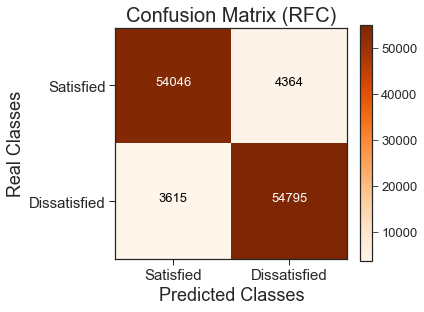

In [25]:
# Plot da "Confusion Matrix":
target_names = ['Satisfied', 'Dissatisfied']
ptlib.plot_confusion_matrix(truth=y_train, pred=y_train_pred_rfc, display_labels=target_names, normalize=False,
                            plot_style='seaborn-ticks', colors=plt.cm.Oranges, title="Confusion Matrix (RFC)",
                            title_fontsize=20, labels_fontsize=18, ticks_fontsize=15, values_fontsize=13, rotation=0,
                            width=6, height=6, figure_id='plot_confusion_matrix_rfc_v2', figure_path=PROJECT_IMG_PATH,
                            figure_file_format="png", figure_file_extension=".png", tight_layout=True, dpi=300
                           )

**Análise:**

Cada **linha** em uma **Matriz de Confusão** representa uma **Classe Real**, enquanto que cada **coluna** representa uma **Classe Prevista**. Portanto, a primeira linha considera os clientes **Satisfeitos** (a classe negativa) e a segunda linha considera os clientes **Insatisfeitos** (a classe positiva). A primeira coluna considera os clientes preditos como **Satisfeitos** (a classe negativa) e a segunda coluna considera os clientes preditos como **Insatisfeitos** (a classe positiva).

Sendo assim, temos no gráfico **`Confusion Matrix`** os seguintes valores:

1. **`TN = 54046`** (**True Negative**): são os clientes que foram classificados (preditos) `corretamente` como `Satisfeitos`;

2. **`FP = 4364`** (**False Positive**): são os clientes que foram classificados (preditos) `erroneamente` como `Insatisfeitos` (na verdade os clientes estão *Satisfeitos*);

3. **`FN = 3615`** (**False Negative**): são os clientes que foram classificados (preditos) `erroneamente` como `Satisfeitos` (na verdade os clientes estão *Insatisfeitos*);

4. **`TP = 54795`** (**True Positive**): são os clientes que foram classificados (preditos) `corretamente` como `Insatisfeitos`.

### Métricas: `Accuracy`, `Precision`, `Recall` e `f1-score`

In [26]:
# Calculando e mostrando as métricas de classificação com o "KNN":
print("Metrics of 'RFC' model:")
accuracy, precision, recall, F1_score = mllib.classif_metrics(y_real=y_train, y_pred=y_train_pred_rfc, metric='All')

# Armazenando as métricas calculadas no data frame:
classif_metrics_df.loc['RFC', 'Accuracy'] = np.round(accuracy, decimals=4)
classif_metrics_df.loc['RFC', 'Precision'] = np.round(precision, decimals=4)
classif_metrics_df.loc['RFC', 'Recall'] = np.round(recall, decimals=4)
classif_metrics_df.loc['RFC', 'f1-score'] = np.round(F1_score, decimals=4)

Metrics of 'RFC' model:
Accuracy = 0.9317
Precision = 0.9262
Recall = 0.9381
f1-score = 0.9321


**Análise:**

1. com o classificador **`RFC`** obtivemos uma ótima taxa de **acurácia** de **93.17%**, ou seja, é a porcentagem de clientes **satisfeitos** e **insatisfeitos** que foram classificados corretamente por ele. Em nosso projeto, o objetivo é entregarmos uma **acurácia** que seja, no **mínimo**, de **90%**. Portanto, o nosso classificador **`RFC`** apresentou um resultado *acima do mínimo desejado*;


2. com o nosso classificador **`RFC`** obtivemos uma taxa de **precisão** de **92.62%**, ou seja, é a porcentagem de clientes **insatisfeitos** que foram classificados corretamente por ele;


3. com o nosso classificador **`RFC`** obtivemos uma taxa de **revocação** de **93.81%**, ou seja, é a porcentagem de clientes **insatisfeitos** que ele conseguiu detectar. Em nosso projeto, o objetivo é entregarmos uma taxa de **revocação** que seja, no **mínimo**, de **85%**. Portanto, o nosso classificador **`RFC`** apresentou um resultado *acima do mínimo desejado*;


4. com o classificador **`RFC`** obtivemos uma **`pontuação F1`** **alta**, devido as ótimas taxas de **precisão** e **revocação**.

### `Curva ROC`

In [27]:
# Calculando as 'pontuações de decisão' nos dados de treinamento:
# Verifica se vamos fazer os cálculos utilizando "validação cruzada":
if (CROSS_VAL_PREDICT): # Utilizar "CROSS_VAL_PREDICT=True" (no Setup) para calcular as pontuações de decisão:
    # Inicia o cálculo das pontuações de decisão:
    et.start(et.start(msg="Starting the calculations of decision scores (RFC)..."))
    
    # Primeiro, calcularemos as probabilidades de cada classe:
    y_probas_rfc = cross_val_predict(estimator=grd_search_rfc.best_estimator_, X=X_train_rfc, y=y_train,
                                     cv=NUM_FOLDS_CVP, method="predict_proba", n_jobs=-1)
    
    # Agora, vamos utilizar as probabilidades da classe positiva (1) como sendo as pontuações de decisão:
    y_dec_scores_rfc = y_probas_rfc[:, 1]
    
    # Fim do cálculo das pontuações de decisão:
    et.end(msg="Time consumed for the calculations of decision scores (RFC):")
    
    # Salvando as pontuações de decisão:
    dslib.pickle_object_save (path=PROJECT_ML_PATH, file="y_dec_scores_rfc_v2.pickle", object_name=y_dec_scores_rfc,
                              msg="Version 2 of the decision scores (RFC) was successfully saved!")
else:
    # Os cálculos das pontuações de decisão já foram feitas!
    # Carregando as pontuações de decisão "y_dec_scores_rfc_v2.pickle":
    y_dec_scores_rfc = dslib.pickle_object_load(path=PROJECT_ML_PATH, file="y_dec_scores_rfc_v2.pickle",
                                                msg="Version 2 of the decision scores (RFC) has been successfully uploaded!")

Version 2 of the decision scores (RFC) has been successfully uploaded!


**Análise:** o tempo consumido para calcularmos as **`pontuações de decisão`**, com o modelo **`RFC`**, foi de **1.33 minutos**.

In [28]:
# Calculando o "FPR" e "TPR":
fpr_rfc, tpr_rfc, thresholds_rfc = roc_curve(y_train, y_dec_scores_rfc)

# Calculando a "Area Under Curve" (AUC):
auc = roc_auc_score(y_train, y_dec_scores_rfc)

# Armazenando a métrica ('AUC') no data frame:
classif_metrics_df.loc['RFC', 'AUC'] = np.round(auc, decimals=4)

Saving figure: plot_roc_curve_rfc_v2


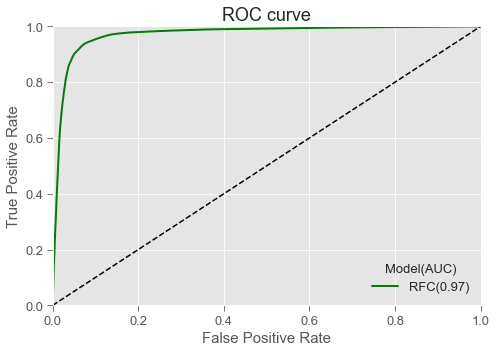

In [29]:
# Plot da "Curva ROC":
ptlib.plot_roc_curve(fpr_rfc, tpr_rfc, auc=auc, auc_decimals=2, plot_style='ggplot', color='green', line_width=2,
                     title='ROC curve', title_fontsize=18, labels_fontsize=15, ticks_fontsize=13,
                     legendtitle='Model(AUC)', legendtitle_fontsize=13, legend_label='RFC', legend_fontsize=13,
                     width=7, height=5, figure_id='plot_roc_curve_rfc_v2', figure_path=PROJECT_IMG_PATH,
                     figure_file_format="png", figure_file_extension=".png", tight_layout=True, dpi=300
                    )

**Análise:**

Podemos observar que o nosso classificador **`RFC`** apresentou uma ***`ROC curve`*** **muito próxima** do *canto superior esquerdo*. A *`Area Under Curve`* nas duas versões foram iguais (**`AUC = 0.97`**).

## 4.3- [XGBC](https://xgboost.readthedocs.io/en/latest/python/python_api.html?highlight=xgbclassifier#xgboost.XGBClassifier) (XGBoost Classifier):

Para selecionarmos os melhores parâmetros do **`XGBC`**, utilizaremos a função **`RandomizedSearchCV()`**. Também utilizaremos neste processo as melhores *features* selecionadas na etapa anterior.

### `Feature Selection`:

Vamos utilizar as *features* selecionadas (importantes) na etapa anterior.

In [30]:
# Selecionando os dados de treinamento, de acordo com as features selecionadas (Importantes) na etapa anterior (Step 01):
X_train_xgbc = X_train[:, rfecv_xgbc.get_support()]
print("X_train_xgbc (shape):",X_train_xgbc.shape)

X_train_xgbc (shape): (116820, 32)


### `RandomizedSearchCV()` (Randomized search on hyper parameters):

In [31]:
# Verifica se vamos realizar a pesquisa dos hiperparâmetros:
if (SEARCHING): # Utilizar "SEARCHING=True" (no Setup) para pesquisar os melhores hiperparâmetros!
    # Definindo o "grid" de parâmetros: utilizei informações deste link:
    # https://towardsdatascience.com/fine-tuning-xgboost-in-python-like-a-boss-b4543ed8b1e
    param_distribs = {'learning_rate': [0.1, 0.01, 0.001],
                      'max_depth': [4, 5, 6],
                      'subsample': [0.8, 0.85, 0.9, 0.95, 1.0],
                      'colsample_bytree': [0.3, 0.4, 0.5, 0.6, 0.7, 0.8],
                      'gamma': [0, 1, 5],
                      'n_estimators': randint(low=100, high=1000)
                      }

    # Inicia a pesquisa:
    et.start(et.start(msg="Starting the searching (XGBC) with 'RandomSearchCV'..."))
    
    # Criando uma instância do classificador RFC:
    xgb_clf = XGBClassifier(random_state=RANDOM_STATE, n_jobs=-1)
    
    # Criando uma instância do 'RandomizedSearchCV':
    rnd_search_xgbc = RandomizedSearchCV(xgb_clf, param_distributions=param_distribs,
                                         n_iter=NUM_ITER, cv=NUM_FOLDS, scoring='accuracy',
                                         random_state=RANDOM_STATE)
    
    # Fit nos dados de treinamento:
    rnd_search_xgbc.fit(X_train_xgbc, y_train)
    
    # Fim da pesquisa:
    et.end(msg="Time consumed for searching (XGBC) with 'RandomSearchCV':")
    
    # Salvando o modelo com os melhores hiperparâmetros encontrados:
    dslib.pickle_object_save (path=PROJECT_ML_PATH, file="rnd_search_xgbc_v2.pickle", object_name=rnd_search_xgbc,
                              msg="Version 2 of the model (XGBC), with 'RandomSearchCV', was successfully saved!")
else:
    # Os melhores hiperparâmetros já foram encontrados!
    # Carregando o modelo com os melhores hiperparâmetros: "rnd_search_xgbc_v2.pickle":
    rnd_search_xgbc = dslib.pickle_object_load(path=PROJECT_ML_PATH, file="rnd_search_xgbc_v2.pickle",
                                               msg="Version 2 of the model (XGBC), with 'RandomSearchCV', has been successfully uploaded!")

Version 2 of the model (XGBC), with 'RandomSearchCV', has been successfully uploaded!


**Análise:** o treinamento do **`XGBC`**, utilizando a função **`RandomSearchCV()`** para a seleção dos melhores hiperparâmetros, demorou **`40.68 minutos`**.

In [32]:
# Relatório dos melhores resultados utilizando o "RandomSearchCV()":
mllib.best_results_report(estimator=rnd_search_xgbc, title="Best results (XGBC) with 'Random Search CV':")

Best results (XGBC) with 'Random Search CV':
Best params: {'colsample_bytree': 0.5, 'gamma': 1, 'learning_rate': 0.1, 'max_depth': 5, 'n_estimators': 971, 'subsample': 0.95}
Best estimator: XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=0.5, gamma=1, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.1, max_delta_step=0, max_depth=5,
              min_child_weight=1, missing=nan, monotone_constraints='()',
              n_estimators=971, n_jobs=-1, num_parallel_tree=1, random_state=42,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=0.95,
              tree_method='exact', validate_parameters=1, verbosity=None)
Best score: 0.9316


Vamos ver a pontuação (**`Score`**) de cada combinação dos hiperparâmetros testados durante a pesquisa com o **`Random Search`**:

In [33]:
cv_res = rnd_search_xgbc.cv_results_
for mean_score, params in zip(cv_res["mean_test_score"], cv_res["params"]):
    print(mean_score, params)

0.8360640301318268 {'colsample_bytree': 0.6, 'gamma': 0, 'learning_rate': 0.001, 'max_depth': 6, 'n_estimators': 171, 'subsample': 1.0}
0.8801489470980997 {'colsample_bytree': 0.7, 'gamma': 5, 'learning_rate': 0.01, 'max_depth': 6, 'n_estimators': 314, 'subsample': 0.9}
0.8242167437082693 {'colsample_bytree': 0.5, 'gamma': 0, 'learning_rate': 0.001, 'max_depth': 5, 'n_estimators': 408, 'subsample': 0.85}
0.8636791645266222 {'colsample_bytree': 0.6, 'gamma': 1, 'learning_rate': 0.01, 'max_depth': 5, 'n_estimators': 291, 'subsample': 0.95}
0.8690035952747817 {'colsample_bytree': 0.7, 'gamma': 0, 'learning_rate': 0.01, 'max_depth': 5, 'n_estimators': 352, 'subsample': 0.95}
0.8365434001027221 {'colsample_bytree': 0.3, 'gamma': 0, 'learning_rate': 0.001, 'max_depth': 6, 'n_estimators': 610, 'subsample': 0.85}
0.8960708782742681 {'colsample_bytree': 0.6, 'gamma': 5, 'learning_rate': 0.01, 'max_depth': 5, 'n_estimators': 786, 'subsample': 0.9}
0.9287365177195686 {'colsample_bytree': 0.6, 'ga

### `Matriz de Confusão`

Para calcularmos a ***Confusion Matrix***, primeiro precisamos ter um conjunto de previsões que possam ser comparadas com os valores (*labels*) reais. Como não podemos utilizar os dados do nosso conjunto de testes, utilizaremos a função ***`cross_val_predict()`***.

Assim como a função ***cross_val_score***, ela desempenha a validação cruzada *K-fold*, mas em vez de retornar as pontuações da avaliação, ela retorna as previsões feitas em cada parte do teste, ou seja, isso significa que nós obteremos uma previsão limpa para cada instância no conjunto de treinamento (**"limpa"**, significando que a previsão é feita por um modelo que nunca viu os dados durante o treinamento).

In [34]:
# Calculando as previsões nos dados de treinamento:
# Verifica se vamos fazer as previsões utilizando "validação cruzada":
if (CROSS_VAL_PREDICT): # Utilizar "CROSS_VAL_PREDICT=True" (no Setup) para fazer as 'previsões'!
    # Inicia as previsões:
    et.start(et.start(msg="Starting cross validation predict (XGBC)..."))
    y_train_pred_xgbc = cross_val_predict(estimator=rnd_search_xgbc.best_estimator_, X=X_train_xgbc, y=y_train,
                                          cv=NUM_FOLDS_CVP, n_jobs=-1)
    
    # Fim das previsões:
    et.end(msg="Time consumed for cross validation predict (XGBC):")
    
    # Salvando as previsões:
    dslib.pickle_object_save (path=PROJECT_ML_PATH, file="y_train_pred_xgbc_v2.pickle", object_name=y_train_pred_xgbc,
                              msg="Version 2 of the predicts (XGBC) was successfully saved!")
else:
    # As previsões já foram feitas!
    # Carregando as previsões "y_train_pred_xgbc_v2.pickle":
    y_train_pred_xgbc = dslib.pickle_object_load(path=PROJECT_ML_PATH, file="y_train_pred_xgbc_v2.pickle",
                                                 msg="Version 2 of the predicts (XGBC) has been successfully uploaded!")

Version 2 of the predicts (XGBC) has been successfully uploaded!


**Análise:** o tempo consumido para fazermos as **`previsões`**, com o modelo **`XGBC`**, foi de **2.12 minutos**.

Saving figure: plot_confusion_matrix_xgbc_v2


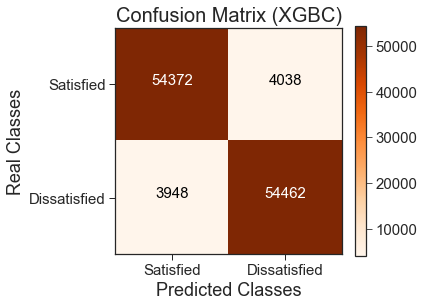

In [35]:
# Plot da "Confusion Matrix":
target_names = ['Satisfied', 'Dissatisfied']
ptlib.plot_confusion_matrix(truth=y_train, pred=y_train_pred_xgbc, display_labels=target_names, normalize=False,
                            plot_style='seaborn-ticks', colors=plt.cm.Oranges, title="Confusion Matrix (XGBC)",
                            title_fontsize=20, labels_fontsize=18, ticks_fontsize=15, values_fontsize=15, rotation=0,
                            width=6, height=6, figure_id='plot_confusion_matrix_xgbc_v2', figure_path=PROJECT_IMG_PATH,
                            figure_file_format="png", figure_file_extension=".png", tight_layout=True, dpi=300
                           )

**Análise:**

Cada **linha** em uma **Matriz de Confusão** representa uma **Classe Real**, enquanto que cada **coluna** representa uma **Classe Prevista**. Portanto, a primeira linha considera os clientes **Satisfeitos** (a classe negativa) e a segunda linha considera os clientes **Insatisfeitos** (a classe positiva). A primeira coluna considera os clientes preditos como **Satisfeitos** (a classe negativa) e a segunda coluna considera os clientes preditos como **Insatisfeitos** (a classe positiva).

Sendo assim, temos no gráfico **`Confusion Matrix`** os seguintes valores:

1. **`TN = 54372`** (**True Negative**): são os clientes que foram classificados (preditos) `corretamente` como `Satisfeitos`;

2. **`FP = 4038`** (**False Positive**): são os clientes que foram classificados (preditos) `erroneamente` como `Insatisfeitos` (na verdade os clientes estão *Satisfeitos*);

3. **`FN = 3948`** (**False Negative**): são os clientes que foram classificados (preditos) `erroneamente` como `Satisfeitos` (na verdade os clientes estão *Insatisfeitos*);

4. **`TP = 54462`** (**True Positive**): são os clientes que foram classificados (preditos) `corretamente` como `Insatisfeitos`.

### Métricas: `Accuracy`, `Precision`, `Recall` e `f1-score`

In [36]:
# Calculando e mostrando as métricas de classificação com o "XGBC":
print("Metrics of 'XGBC' model:")
accuracy, precision, recall, F1_score = mllib.classif_metrics(y_real=y_train, y_pred=y_train_pred_xgbc, metric='All')

# Armazenando as métricas calculadas no data frame:
classif_metrics_df.loc['XGBC', 'Accuracy'] = np.round(accuracy, decimals=4)
classif_metrics_df.loc['XGBC', 'Precision'] = np.round(precision, decimals=4)
classif_metrics_df.loc['XGBC', 'Recall'] = np.round(recall, decimals=4)
classif_metrics_df.loc['XGBC', 'f1-score'] = np.round(F1_score, decimals=4)

Metrics of 'XGBC' model:
Accuracy = 0.9316
Precision = 0.9310
Recall = 0.9324
f1-score = 0.9317


**Análise:**

1. com o classificador **`XGBC`** obtivemos uma ótima taxa de **acurácia** de **93.16%**, ou seja, é a porcentagem de clientes **satisfeitos** e **insatisfeitos** que foram classificados corretamente por ele. Em nosso projeto, o objetivo é entregarmos uma **acurácia** que seja, no **mínimo**, de **90%**. Portanto, o nosso classificador **`XGBC`** apresentou um resultado *acima do mínimo desejado*;


2. com o nosso classificador **`XGBC`** obtivemos uma taxa de **precisão** de **93.10%**, ou seja, é a porcentagem de clientes **insatisfeitos** que foram classificados corretamente por ele;


3. com o nosso classificador **`XGBC`** obtivemos uma taxa de **revocação** de **93.24%**, ou seja, é a porcentagem de clientes **insatisfeitos** que ele conseguiu detectar. Em nosso projeto, o objetivo é entregarmos uma taxa de **revocação** que seja, no **mínimo**, de **85%**. Portanto, o nosso classificador **`XGBC`** apresentou um resultado *acima do mínimo desejado*;


4. com o classificador **`XGBC`** obtivemos uma **`pontuação F1`** **alta**, devido as ótimas taxas de **precisão** e **revocação**.

### `Curva ROC`

In [37]:
# Calculando as 'pontuações de decisão' nos dados de treinamento:
# Verifica se vamos fazer os cálculos utilizando "validação cruzada":
if (CROSS_VAL_PREDICT): # Utilizar "CROSS_VAL_PREDICT=True" (no Setup) para calcular as pontuações de decisão:
    # Inicia o cálculo das pontuações de decisão:
    et.start(et.start(msg="Starting the calculations of decision scores (XGBC)..."))
    
    # Primeiro, calcularemos as probabilidades de cada classe:
    y_probas_xgbc = cross_val_predict(estimator=rnd_search_xgbc.best_estimator_, X=X_train_xgbc, y=y_train,
                                      cv=NUM_FOLDS_CVP, method="predict_proba", n_jobs=-1)
    
    # Agora, vamos utilizar as probabilidades da classe positiva (1) como sendo as pontuações de decisão:
    y_dec_scores_xgbc = y_probas_xgbc[:, 1]
    
    # Fim do cálculo das pontuações de decisão:
    et.end(msg="Time consumed for the calculations of decision scores (XGBC):")
    
    # Salvando as pontuações de decisão:
    dslib.pickle_object_save (path=PROJECT_ML_PATH, file="y_dec_scores_xgbc_v2.pickle", object_name=y_dec_scores_xgbc,
                              msg="Version 2 of the decision scores (XGBC) was successfully saved!")
else:
    # Os cálculos das pontuações de decisão já foram feitas!
    # Carregando as pontuações de decisão "y_dec_scores_xgbc_v2.pickle":
    y_dec_scores_xgbc = dslib.pickle_object_load(path=PROJECT_ML_PATH, file="y_dec_scores_xgbc_v2.pickle",
                                                 msg="Version 2 of the decision scores (XGBC) has been successfully uploaded!")

Version 2 of the decision scores (XGBC) has been successfully uploaded!


**Análise:** o tempo consumido para calcularmos as **`pontuações de decisão`**, com o modelo **`XGBC`**, foi de **2.00 minutos**.

In [38]:
# Calculando o "FPR" e "TPR":
fpr_xgbc, tpr_xgbc, thresholds_xgbc = roc_curve(y_train, y_dec_scores_xgbc)

# Calculando a "Area Under Curve" (AUC):
auc = roc_auc_score(y_train, y_dec_scores_xgbc)

# Armazenando a métrica ('AUC') no data frame:
classif_metrics_df.loc['XGBC', 'AUC'] = np.round(auc, decimals=4)

Saving figure: plot_roc_curve_xgbc_v2


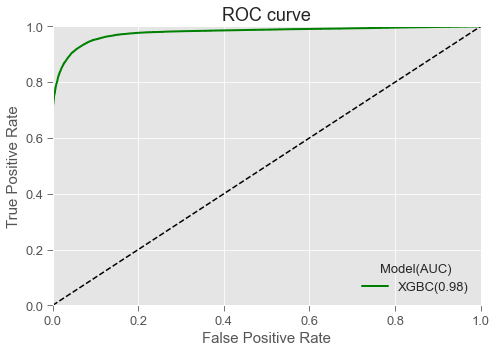

In [39]:
# Plot da "Curva ROC":
ptlib.plot_roc_curve(fpr_xgbc, tpr_xgbc, auc=auc, auc_decimals=2, plot_style='ggplot', color='green', line_width=2,
                     title='ROC curve', title_fontsize=18, labels_fontsize=15, ticks_fontsize=13,
                     legendtitle='Model(AUC)', legendtitle_fontsize=13, legend_label='XGBC', legend_fontsize=13,
                     width=7, height=5, figure_id='plot_roc_curve_xgbc_v2', figure_path=PROJECT_IMG_PATH,
                     figure_file_format="png", figure_file_extension=".png", tight_layout=True, dpi=300
                    )

**Análise:** 

Podemos observar que o nosso classificador **`XGBC`** apresentou uma ***`ROC curve`*** **muito próxima** do *canto superior esquerdo*. A *`Area Under Curve`* nas duas versões foram iguais (**`AUC = 0.98`**).

### Comparando as `Curvas ROC` entre os modelos:

In [40]:
# Criando um objeto 'dicionário' para os valores "FPR", calculados, de cada modelo:
fpr_dic = {'KNN': fpr_knn, 'RFC': fpr_rfc, 'XGBC': fpr_xgbc}

# Criando um objeto 'dicionário' para os valores "TPR", calculados, de cada modelo:
tpr_dic = {'KNN': tpr_knn, 'RFC': tpr_rfc, 'XGBC': tpr_xgbc}

Saving figure: plot_roc_curves_models_v2


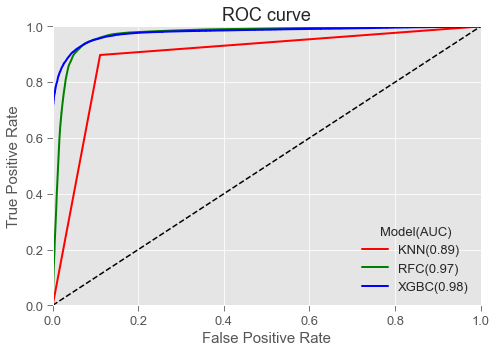

Saving figure: plot_roc_curves_zoomed_models_v2


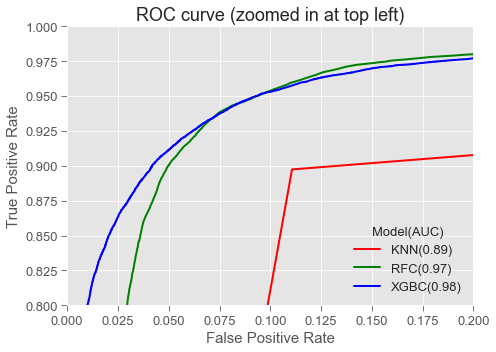

In [41]:
# Plot das "Curvas ROC":
ptlib.plot_roc_curves(fpr=fpr_dic, tpr=tpr_dic, auc=classif_metrics_df[['AUC']], auc_decimals=2, plot_style='ggplot',
                      color=['red', 'green', 'blue'], line_width=2, scales=None, title='ROC curve', title_fontsize=18,
                      labels_fontsize=15, ticks_fontsize=13, legendtitle='Model(AUC)', legendtitle_fontsize=13,
                      legend_label=['KNN', 'RFC', 'XGBC'], legend_fontsize=13, width=7, height=5,
                      figure_id='plot_roc_curves_models_v2', figure_path=PROJECT_IMG_PATH,
                      figure_file_format="png", figure_file_extension=".png", tight_layout=True, dpi=300
                     )

# Plot das "Curvas ROC" (com 'foco' no canto superior esquerdo):
ptlib.plot_roc_curves(fpr=fpr_dic, tpr=tpr_dic, auc=classif_metrics_df[['AUC']], auc_decimals=2, plot_style='ggplot',
                      color=['red', 'green', 'blue'], line_width=2, scales=[0, 0.2, 0.8, 1.0],
                      title='ROC curve (zoomed in at top left)', title_fontsize=18, labels_fontsize=15, ticks_fontsize=13,
                      legendtitle='Model(AUC)', legendtitle_fontsize=13, legend_label=['KNN', 'RFC', 'XGBC'],
                      legend_fontsize=13, width=7, height=5,
                      figure_id='plot_roc_curves_zoomed_models_v2', figure_path=PROJECT_IMG_PATH,
                      figure_file_format="png", figure_file_extension=".png", tight_layout=True, dpi=300
                     )

**Análise:**

Podemos observar que os melhores resultados foram obtidos com os modelos **`RFC`** (**`AUC=0.97`**) e **`XGBC`** (**`AUC=0.98`**).

## 05- Conclusão:

Agora, vamos plotar um gráfico comparando as taxas de acurácia (**`Accuracy`**) e as taxas de revocação (**`Recall`**), de cada modelo, e então vamos selecionar alguns modelos para a próxima etapa (**`Machine Learning (Step 04)`**):

Saving figure: plot_models_vs_accuracy_v2


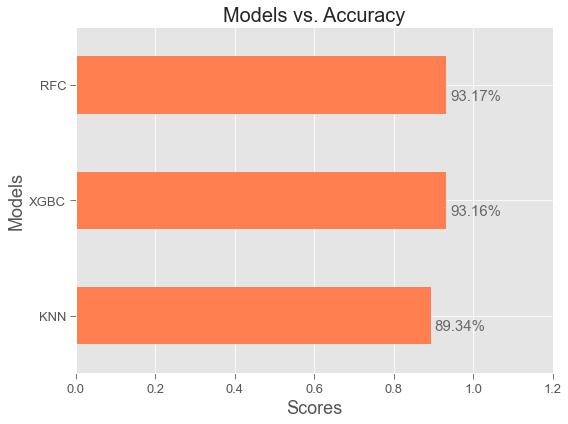

Saving figure: plot_models_vs_recall_v2


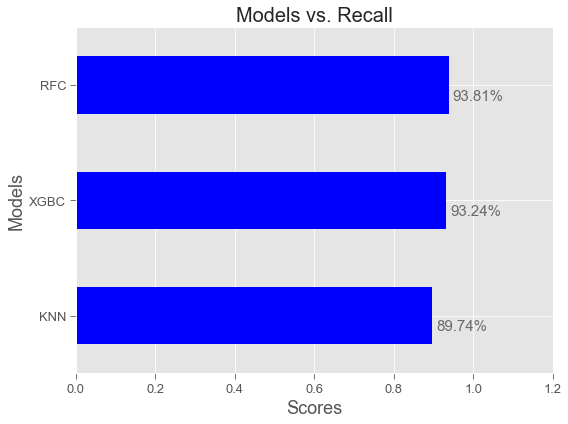

In [42]:
# Classificando as taxas de acurácia:
models_accuracy = classif_metrics_df['Accuracy'].sort_values(ascending=False)

# Plot:
ptlib.plot_models_vs_scores(scores=models_accuracy, plot_style='ggplot', bar_color='coral', alpha=0.8,
                            score_color='dimgrey', score_fontsize=15, title="Models vs. Accuracy",
                            title_fontsize=20, xlabel="Scores", xlabel_fontsize=18, ylabel='Models',
                            ylabel_fontsize=18, ticks_fontsize=13, width=8, height=6,
                            figure_id='plot_models_vs_accuracy_v2', figure_path=PROJECT_IMG_PATH,
                            figure_file_format="png", figure_file_extension=".png",
                            tight_layout=True, dpi=300
                           )

# Classificando as taxas de revocação:
models_recall = classif_metrics_df['Recall'].sort_values(ascending=False)

# Plot:
ptlib.plot_models_vs_scores(scores=models_recall, plot_style='ggplot', bar_color='blue', alpha=0.8,
                            score_color='dimgrey', score_fontsize=15, title="Models vs. Recall",
                            title_fontsize=20, xlabel="Scores", xlabel_fontsize=18, ylabel='Models',
                            ylabel_fontsize=18, ticks_fontsize=13, width=8, height=6,
                            figure_id='plot_models_vs_recall_v2', figure_path=PROJECT_IMG_PATH,
                            figure_file_format="png", figure_file_extension=".png",
                            tight_layout=True, dpi=300
                           )

**Análise:**

De acordo com os objetivos do projeto (**`Accuracy = 90%`** e **`Recall = 85%`**), podemos observar que os `03` algoritmos se destacaram e obtiveram resultados satisfatórios (com o **`KNN`** conseguimos chegar muito próximo do mínimo desejado para a **acurácia**).

Portanto, para a etapa final desta fase, vamos utilizar os `03` algoritmos e comparar os resultados:

> 1. **`RFC`**: Random Forest Classifier;
> 2. **`XGBC`**: XGBoost Classifier;
> 3. **`KNN`**: K Nearest Neighbors.

## 06- Salvando as `métricas de classificação`:

In [43]:
# Mostrar as métricas de classificação calculadas nesta etapa:
classif_metrics_df

,Accuracy,Precision,Recall,f1-score,AUC
Models,,,,,
KNN,0.8934,0.8902,0.8974,0.8938,0.8934
RFC,0.9317,0.9262,0.9381,0.9321,0.9711
XGBC,0.9316,0.931,0.9324,0.9317,0.9783


In [44]:
# Salvando as métricas de classificação:
dslib.pickle_object_save (path=PROJECT_ML_PATH, file="classif_metrics_df_v2.pickle", object_name=classif_metrics_df,
                          msg="The 'classif_metrics_df_v2' (metrics) has been successfully saved!")

The 'classif_metrics_df_v2' (metrics) has been successfully saved!


## <font color='black'>FIM</font>